shape of img: torch.Size([3, 1014, 1352])
cam info: Camera(path='scenes/coffee/cam00', intri=tensor([[730.3772,   0.0000, 676.0000],
        [  0.0000, 730.3772, 507.0000],
        [  0.0000,   0.0000,   1.0000]]), c2w_R=tensor([[ 0.3326,  0.0721, -0.9403],
        [-0.9426,  0.0581, -0.3289],
        [ 0.0309,  0.9957,  0.0873]], dtype=torch.float64), c2w_t=tensor([ 2.9485,  2.3158, -0.6131], dtype=torch.float64), width=1352, height=1014, frame=0)
c2w: tensor([[ 0.3326,  0.0721, -0.9403,  2.9485],
        [-0.9426,  0.0581, -0.3289,  2.3158],
        [ 0.0309,  0.9957,  0.0873, -0.6131],
        [ 0.0000,  0.0000,  0.0000,  1.0000]])


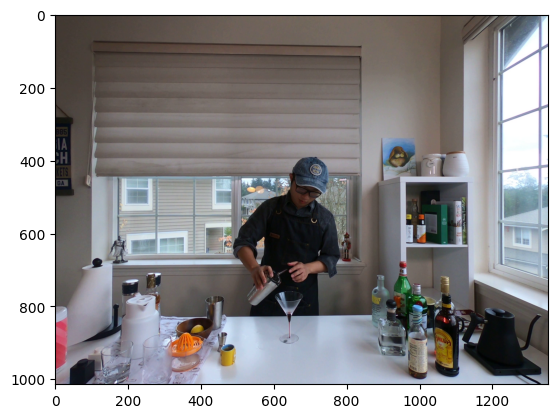

KeyboardInterrupt: Interrupted by user

In [1]:
from dataset import SceneReader
import hydra
from hydra import compose, initialize
from hydra.core.global_hydra import GlobalHydra

import matplotlib.pyplot as plt
from IPython.display import clear_output

try:
    initialize(version_base=None, config_path=".")
except:
    pass
cfg = compose(config_name="config")
scene = SceneReader(cfg.data, cache_in_GPU=True)

batches = [
    (i, j, k) for i in range(18) for j in range(3) for k in [1,2,4]
]

for b in batches:
    clear_output(wait=True)
    ret = scene.batch_get([b])
    cam, img = ret[0]
    img = img.to("cpu")
    print(f"shape of img: {img.shape}")
    print(f"cam info: {cam}")
    print(f"c2w: {cam.c2w}")
    plt.imshow(img.permute(1,2,0))
    plt.show()
    input("Press Enter to continue...")

